In [6]:
import pandas as pd
import numpy as np
import os
import csv

# ------------------------------------------------
# 1. Define File Paths
# ------------------------------------------------

In [7]:
LANGUOID_CSV = '/Users/mehmetsundu/mysql_files/languoid.csv'
LANGUAGE_CSV = '/Users/mehmetsundu/mysql_files/language.csv'
LANGUAGES_AND_DIALECTS_GEO_CSV = '/Users/mehmetsundu/mysql_files/languages-and-dialects-geo.csv'

In [8]:
# Output directories for cleaned data
CLEANED_DATA_DIR = '/Users/mehmetsundu/mysql_files/cleaned_data'
os.makedirs(CLEANED_DATA_DIR, exist_ok=True)

# ------------------------------------------------
# 2. Preprocess CSV Files to Standardize Quotes
# ------------------------------------------------

In [9]:
def preprocess_csv(input_path, output_path):
    """
    Preprocesses a CSV file by standardizing quotes and escaping delimiters.
    """
    with open(input_path, 'r', encoding='utf-8') as infile, \
         open(output_path, 'w', encoding='utf-8', newline='') as outfile:
        reader = csv.reader(infile, delimiter=',', quotechar="'", escapechar='\\')
        writer = csv.writer(outfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for row in reader:
            writer.writerow(row)

# Preprocess each CSV file
preprocess_csv(LANGUOID_CSV, os.path.join(CLEANED_DATA_DIR, 'preprocessed_languoid.csv'))
preprocess_csv(LANGUAGE_CSV, os.path.join(CLEANED_DATA_DIR, 'preprocessed_language.csv'))
preprocess_csv(LANGUAGES_AND_DIALECTS_GEO_CSV, os.path.join(CLEANED_DATA_DIR, 'preprocessed_languages_and_dialects_geo.csv'))

print("Preprocessing of CSV files completed.")

# Update file paths to preprocessed files
PREPROCESSED_LANGUOID_CSV = os.path.join(CLEANED_DATA_DIR, 'preprocessed_languoid.csv')
PREPROCESSED_LANGUAGE_CSV = os.path.join(CLEANED_DATA_DIR, 'preprocessed_language.csv')
PREPROCESSED_LANGUAGES_AND_DIALECTS_GEO_CSV = os.path.join(CLEANED_DATA_DIR, 'preprocessed_languages_and_dialects_geo.csv')



Preprocessing of CSV files completed.


# 3. Read Preprocessed CSV Files with Enhanced Error Handling


In [10]:
# Function to read CSV with single quote enclosure and handle newlines within fields
def read_csv_single_quote_with_logging(path, **kwargs):
    bad_lines = []

    def bad_line_handler(bad_line):
        bad_lines.append(bad_line)
        return None  # Skip the bad line

    df = pd.read_csv(
        path,
        sep=',',
        quotechar='"',              # Updated to double quotes after preprocessing
        escapechar='\\',
        encoding='utf-8',
        engine='python',
        on_bad_lines=bad_line_handler,
        **kwargs
    )
    return df, bad_lines

# a. Read preprocessed_languoid.csv
try:
    languoid_df, languoid_bad = read_csv_single_quote_with_logging(
        PREPROCESSED_LANGUOID_CSV,
        dtype={
            'id': str,
            'name': str,
            'level': str,
            'status': str,
            'family_pk': str,
            'father_pk': str,
            'hid': str,
            'jsondata': str,
            'newick': str,
            'pk': str
        },
        na_values=['', 'NULL', 'NaN']
    )
    print("Successfully loaded preprocessed_languoid.csv")
    if languoid_bad:
        print(f"Found {len(languoid_bad)} bad lines in preprocessed_languoid.csv:")
        for line in languoid_bad:
            print(line)
except Exception as e:
    print(f"Error loading preprocessed_languoid.csv: {e}")

# b. Read preprocessed_language.csv
try:
    language_df, language_bad = read_csv_single_quote_with_logging(
        PREPROCESSED_LANGUAGE_CSV,
        dtype={
            'glottocode': str,
            'Name': str,
            'iso_code': str,
            'family': str,
            'genus': str,
            'macroarea': str,
            'countrycodes': str
        },
        na_values=['', 'NULL', 'NaN']
    )
    print("Successfully loaded preprocessed_language.csv")
    if language_bad:
        print(f"Found {len(language_bad)} bad lines in preprocessed_language.csv:")
        for line in language_bad:
            print(line)
except Exception as e:
    print(f"Error loading preprocessed_language.csv: {e}")

# c. Read preprocessed_languages-and-dialects-geo.csv
try:
    languages_geo_df, languages_geo_bad = read_csv_single_quote_with_logging(
        PREPROCESSED_LANGUAGES_AND_DIALECTS_GEO_CSV,
        dtype={
            'glottocode': str,
            'name': str,
            'isocodes': str,
            'level': str,
            'macroarea': str,
            'latitude': float,
            'longitude': float
        },
        na_values=['', 'NULL', 'NaN']
    )
    print("Successfully loaded preprocessed_languages-and-dialects-geo.csv")
    if languages_geo_bad:
        print(f"Found {len(languages_geo_bad)} bad lines in preprocessed_languages-and-dialects-geo.csv:")
        for line in languages_geo_bad:
            print(line)
except Exception as e:
    print(f"Error loading preprocessed_languages-and-dialects-geo.csv: {e}")

Successfully loaded preprocessed_languoid.csv
Found 6713 bad lines in preprocessed_languoid.csv:
['False', '0', '0', '2', '', '202', '1349', 'aiz', 'aari1238', '{}', '', 'family', '', '', 'Aari-Gayil', '"(\'Aari [aari1239][aiw]-l-\'', 'Gayil [gayi1237][gyl]-l-)\'Aari-Gayil [aari1238][aiz]\'"', '2656', 'safe']
['False', '29', '12', '21', '', '10', '7598', '', 'abab1240', '{}', '', 'family', '', '', 'Ababuan', '"((\'Bafwandaka [bafw1242]\'', 'Bakundumu [baku1261]', 'Bekeni [beke1238]', "Bemili [bemi1238])'Bali {Democratic Republic of Congo} [bali1274][bcp]-l-'", "((('Kigumu [kigu1238]'", 'Kyanzi [kyan1239]', "Suwa [suwa1240])'Amba {Uganda} [amba1263][rwm]-l-'", 'Bera [bera1259][brf]-l-', "(('Bugombe [bugo1238]')'Bhele [bhel1238][bhy]-l-'", "(('Bombi-Ngbanja [bomb1260]'", "Nyaku [nyak1259])'Bila [bila1255][bip]-l-'", "Kaiku [kaik1247][kkq]-l-)'Bila-Kaiku [bila1259]'", 'Kango {Tshopo District} [kang1285][kzy]-l-', "Komo {Democratic Republic of Congo} [komo1260][kmw]-l-)'Bilaic [bila1258]')

# 4. Clean and Standardize Data


In [11]:
# a. Clean 'status' field in languoid_df
def clean_status(status):
    if pd.isnull(status):
        return 'unknown'
    # Remove single quotes and newline characters, trim whitespace, convert to lowercase
    return status.replace("'", "").replace("\n", "").strip().lower()

languoid_df['status_cleaned'] = languoid_df['status'].apply(clean_status)

# b. Clean 'family' and 'genus' in language_df
language_df['family'] = language_df['family'].str.strip().str.lower()
language_df['genus'] = language_df['genus'].str.strip().str.lower()

# c. Clean 'name' fields by trimming whitespace
languoid_df['name'] = languoid_df['name'].str.strip()
language_df['Name'] = language_df['Name'].str.strip()
languages_geo_df['name'] = languages_geo_df['name'].str.strip()

# d. Handle missing latitude and longitude in language_df and languages_geo_df
# Already handled by na_values during reading

# e. Verify and handle duplicate Glottocodes within each dataset

# Function to check duplicates
def check_duplicates(df, column, dataset_name):
    duplicates = df[df[column].duplicated(keep=False)]
    if not duplicates.empty:
        print(f"Duplicate Glottocodes found in {dataset_name}:")
        print(duplicates[[column]].drop_duplicates())
    else:
        print(f"No duplicate Glottocodes in {dataset_name}.")

check_duplicates(languoid_df, 'id', 'preprocessed_languoid.csv')
check_duplicates(language_df, 'glottocode', 'preprocessed_language.csv')
check_duplicates(languages_geo_df, 'glottocode', 'preprocessed_languages-and-dialects-geo.csv')

# Assuming no duplicates found; if duplicates exist, decide how to handle them (e.g., keep first, aggregate)

# f. Drop duplicates if any (keeping the first occurrence)
languoid_df = languoid_df.drop_duplicates(subset='id', keep='first')
language_df = language_df.drop_duplicates(subset='glottocode', keep='first')
languages_geo_df = languages_geo_df.drop_duplicates(subset='glottocode', keep='first')


No duplicate Glottocodes in preprocessed_languoid.csv.
Duplicate Glottocodes found in preprocessed_language.csv:
     glottocode
0           NaN
3      chad1249
5      nort3139
30     adyg1241
33     aleu1260
...         ...
2583   cent2127
2586   east2295
2632   cent2128
2664   zulu1248
2667   copa1236

[133 rows x 1 columns]
No duplicate Glottocodes in preprocessed_languages-and-dialects-geo.csv.


# 5. Validate Glottocode Consistency Across Datasets


In [12]:
# a. Ensure that Glottocode in language_df exists in languoid_df
missing_in_languoid = language_df[~language_df['glottocode'].isin(languoid_df['id'])]
if not missing_in_languoid.empty:
    print("Glottocodes in language.csv not found in languoid.csv:")
    print(missing_in_languoid[['glottocode', 'Name']])
else:
    print("All Glottocodes in language.csv are present in languoid.csv.")

# b. Ensure that Glottocode in languages_geo_df exists in languoid_df
missing_in_languoid_geo = languages_geo_df[~languages_geo_df['glottocode'].isin(languoid_df['id'])]
if not missing_in_languoid_geo.empty:
    print("Glottocodes in languages-and-dialects-geo.csv not found in languoid.csv:")
    print(missing_in_languoid_geo[['glottocode', 'name']])
else:
    print("All Glottocodes in languages-and-dialects-geo.csv are present in languoid.csv.")

Glottocodes in language.csv not found in languoid.csv:
     glottocode                          Name
0           NaN                 Arapesh (Abu)
3      chad1249         Arabic (Abbéché Chad)
4      abid1235                        Abidji
5      nort3139               Arabic (Beirut)
8      abkh1244                        Abkhaz
...         ...                           ...
2663   zima1244                      Zimakani
2664   zulu1248               Zulu (Northern)
2667   copa1236             Zoque (Copainalá)
2672   sanj1284  Zapotec (San Lucas Quiaviní)
2677   zoog1238            Zapotec (Zoogocho)

[1195 rows x 2 columns]
Glottocodes in languages-and-dialects-geo.csv not found in languoid.csv:
      glottocode              name
23      abaz1241             Abaza
29      abid1235            Abidji
37      abkh1244         Abkhazian
48      abuu1241               Abu
49      abua1244              Abua
...          ...               ...
18569   zinz1238             Zinza
18588   zoog123

# 6. Merge Datasets on Glottocode


In [13]:
# a. Merge language_df with languoid_df on Glottocode
merged_df = pd.merge(
    language_df,
    languoid_df[['id', 'status_cleaned']],
    how='left',
    left_on='glottocode',
    right_on='id',
    validate='many_to_one'  # Each glottocode in language_df should map to one in languoid_df
)

# b. Merge with languages_geo_df to include geographical data
merged_df = pd.merge(
    merged_df,
    languages_geo_df[['glottocode', 'latitude', 'longitude', 'macroarea']],
    how='left',
    on='glottocode',
    suffixes=('_wals', '_geo'),
    validate='many_to_one'
)

# 7. Final Cleaning and Preparation

In [14]:
# a. Handle missing 'status_cleaned' by assigning 'unknown'
merged_df['status_cleaned'] = merged_df['status_cleaned'].fillna('unknown')

# b. Select and rename necessary columns for MySQL
final_df = merged_df.rename(columns={
    'glottocode': 'Language_ID',
    'Name': 'Language_Name',
    'iso_code': 'ISO_Code',
    'family': 'Family_Name',
    'genus': 'Genus_Name',
    'macroarea_wals': 'Macroarea_WALS',
    'macroarea_geo': 'Macroarea_Geo',
    'latitude_wals': 'Latitude_WALS',
    'longitude_wals': 'Longitude_WALS',
    'latitude_geo': 'Latitude_Geo',
    'longitude_geo': 'Longitude_Geo',
    'status_cleaned': 'Status'
})

# c. Consolidate latitude and longitude (prioritize geo data if available)
final_df['Latitude'] = final_df['Latitude_Geo'].combine_first(final_df['Latitude_WALS'])
final_df['Longitude'] = final_df['Longitude_Geo'].combine_first(final_df['Longitude_WALS'])

# d. Consolidate macroarea (prioritize geo data if available)
final_df['Macroarea'] = final_df['Macroarea_Geo'].combine_first(final_df['Macroarea_WALS'])

# e. Select relevant columns
final_df = final_df[[
    'Language_ID',
    'Language_Name',
    'ISO_Code',
    'Family_Name',
    'Genus_Name',
    'Status',
    'Macroarea',
    'Latitude',
    'Longitude',
    'countrycodes'
]]

# f. Handle missing Family or Genus names
# You may choose to fill missing families/genera with 'unknown' or drop them
final_df['Family_Name'] = final_df['Family_Name'].fillna('unknown')
final_df['Genus_Name'] = final_df['Genus_Name'].fillna('unknown')

# 8. Extract Families and Genera Tables

In [15]:
# a. Extract unique families
families_df = final_df[['Family_Name']].drop_duplicates().reset_index(drop=True)
families_df['Family_ID'] = families_df.index + 1  # Assign unique Family_ID starting from 1

# b. Extract unique genera with corresponding Family_ID
# Merge to get Family_ID for each genus
genera_df = final_df[['Genus_Name', 'Family_Name']].drop_duplicates().reset_index(drop=True)
genera_df = pd.merge(
    genera_df,
    families_df,
    on='Family_Name',
    how='left',
    validate='many_to_one'
)
genera_df = genera_df.rename(columns={'Family_ID': 'Family_ID'})
genera_df['Genus_ID'] = genera_df.index + 1  # Assign unique Genus_ID starting from 1


# 9. Assign Family_ID and Genus_ID to Languages


In [16]:
# a. Merge final_df with families_df to get Family_ID
final_df = pd.merge(
    final_df,
    families_df,
    on='Family_Name',
    how='left',
    validate='many_to_one'
)

# b. Merge with genera_df to get Genus_ID
final_df = pd.merge(
    final_df,
    genera_df[['Genus_Name', 'Genus_ID']],
    on='Genus_Name',
    how='left',
    validate='many_to_one'
)

# c. Handle missing Family_ID or Genus_ID
final_df['Family_ID'] = final_df['Family_ID'].fillna(0).astype(int)
final_df['Genus_ID'] = final_df['Genus_ID'].fillna(0).astype(int)

# 10. Export Cleaned Data to CSV for MySQL Loading

In [17]:
# a. Export Families Table
families_df.to_csv(
    os.path.join(CLEANED_DATA_DIR, 'Families.csv'),
    index=False,
    columns=['Family_ID', 'Family_Name']
)
print("Exported Families.csv")

# b. Export Genera Table
genera_export_df = genera_df[['Genus_ID', 'Genus_Name', 'Family_ID']]
genera_export_df.to_csv(
    os.path.join(CLEANED_DATA_DIR, 'Genera.csv'),
    index=False
)
print("Exported Genera.csv")

# c. Export Languages Table
languages_export_df = final_df.rename(columns={
    'countrycodes': 'Countrycodes'
})[['Language_ID', 'Language_Name', 'ISO_Code', 'Family_ID', 'Genus_ID', 'Status', 'Macroarea', 'Latitude', 'Longitude', 'Countrycodes']]

languages_export_df.to_csv(
    os.path.join(CLEANED_DATA_DIR, 'Languages.csv'),
    index=False
)
print("Exported Languages.csv")

Exported Families.csv
Exported Genera.csv
Exported Languages.csv


# 11. Summary of Cleaning Process


In [18]:
print("\nData Cleaning Process Completed Successfully!")
print(f"Cleaned data exported to directory: {CLEANED_DATA_DIR}")


Data Cleaning Process Completed Successfully!
Cleaned data exported to directory: /Users/mehmetsundu/mysql_files/cleaned_data


Explanation of the Updated Script
## Preprocessing CSV Files

### Purpose
Standardizes the quoting style by converting single quotes to double quotes, ensuring that delimiters within fields are properly handled.

### Function `preprocess_csv`
- **Description**: Reads each CSV using the `csv` module and writes out a preprocessed version with consistent quoting.
- **Usage**: Preprocesses each CSV file before attempting to load it with Pandas.

## Enhanced CSV Loading with Logging

### Function `read_csv_single_quote_with_logging`
- **Description**: Reads the preprocessed CSV and captures any bad lines without stopping the script.
- **Handling Bad Lines**: Bad lines are appended to a list and printed out for manual inspection, allowing you to address them accordingly.

## Data Cleaning and Standardization

### Cleaning `status` Field
- Removes unwanted characters and standardizes the text to lowercase.

### Standardizing `family` and `genus`
- Converts to lowercase and trims whitespace for consistency.

### Removing Duplicates
- Checks and removes duplicate Glottocodes to maintain data integrity.

## Validating Glottocode Consistency
Ensures that every Glottocode in one dataset exists in all others, preventing incomplete data linkage.

## Merging Datasets
Combines language-specific data with linguistic classifications and geographical information using Glottocode as the key.

## Final Preparation
- Consolidates geographical data, handles missing values, and selects relevant columns for export.

## Extracting Families and Genera Tables
Creates separate dataframes for families and genera with unique identifiers, establishing hierarchical relationships.

## Exporting Cleaned Data
Saves the cleaned and merged data into CSV files ready for MySQL loading.

## Next Steps After Data Cleaning

### Import Cleaned CSVs into MySQL
Use `LOAD DATA INFILE` or MySQL client tools to import `Families.csv`, `Genera.csv`, and `Languages.csv` into your MySQL database.

### Verify Data Integrity in MySQL
After importing, perform checks to ensure that data has been accurately loaded and that relationships are correctly established.

### Proceed with Analysis
Utilize the cleaned data in MySQL to perform your endangerment rate analyses as initially planned.

## Additional Recommendations

### Automate the Preprocessing Step
Incorporate the preprocessing function into your main script to streamline the workflow.

### Handle Remaining Bad Lines
For any bad lines that still exist after preprocessing, consider implementing further cleaning steps or consulting the data source for corrections.

### Use Logging for Better Traceability
Implement logging mechanisms to record the cleaning process, errors encountered, and actions taken. This aids in debugging and provides a record for future reference.

### Validate Data Post-Cleaning
Perform summary statistics and visual inspections to ensure that the data reflects realistic and expected distributions.

## Conclusion
By updating your Python data cleaning script with enhanced parsing configurations, preprocessing steps, and robust error handling, you can effectively manage and rectify CSV parsing errors. This ensures that your datasets are accurately loaded, cleaned, and prepared for meaningful analysis within your MySQL database. Always remember to inspect and address any remaining data inconsistencies manually or through additional automated processes to maintain the integrity and reliability of your analysis.

If you encounter further issues or need assistance with specific steps in the data cleaning or MySQL loading processes, feel free to ask!

Index(['Family_Name', 'Genus_Name', 'Total_Languages', 'Endangered_Languages',
       'Endangerment_Rate_Percentage'],
      dtype='object')


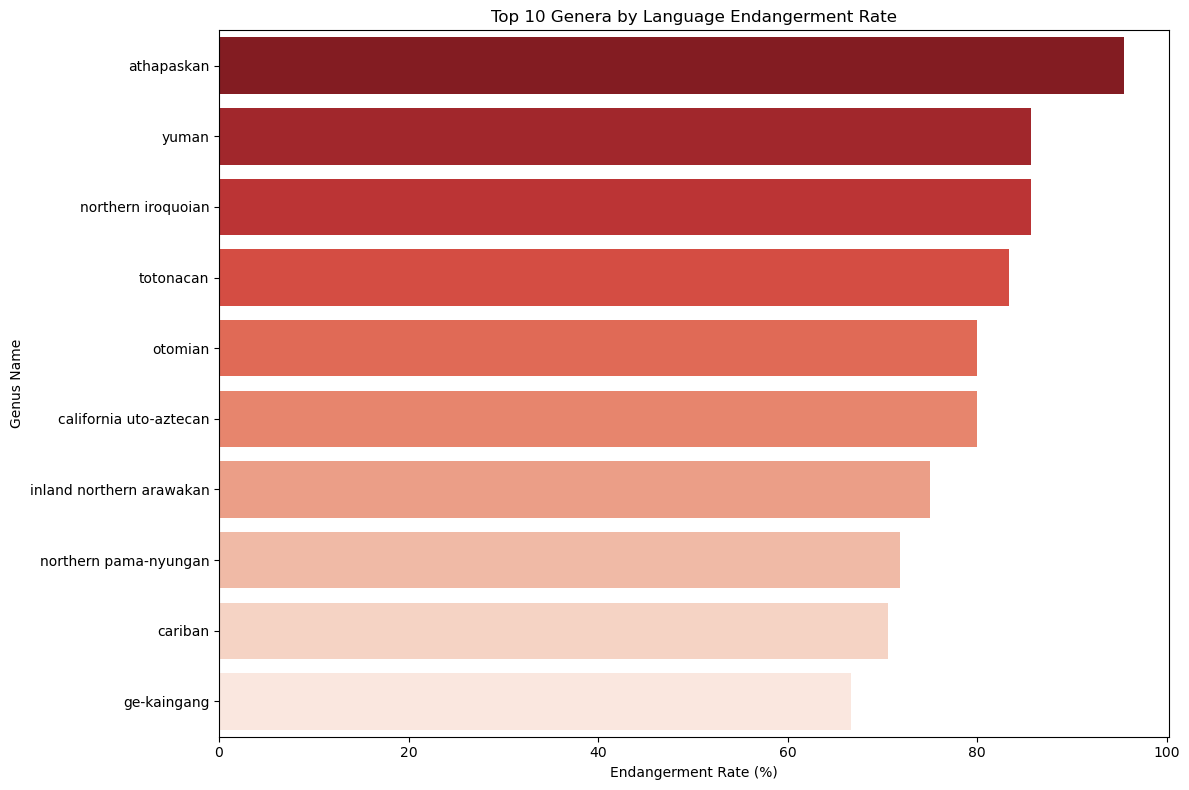

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the exported CSV
df = pd.read_csv('/Users/mehmetsundu/mysql_files/cleaned_data/endangerment_rates_per_family_genus.csv')

# Rename columns to more meaningful names
df.columns = ['Family_Name', 'Genus_Name', 'Total_Languages', 'Endangered_Languages', 'Endangerment_Rate_Percentage']

# Check the column names to ensure they match
print(df.columns)

# Create a bar chart for the top 10 genera with highest endangerment rates
top_10 = df.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Endangerment_Rate_Percentage', y='Genus_Name', data=top_10, palette='Reds_r')
plt.title('Top 10 Genera by Language Endangerment Rate')
plt.xlabel('Endangerment Rate (%)')
plt.ylabel('Genus Name')
plt.tight_layout()
plt.show()


In [33]:
column_names = [
    'Language_ID', 'Language_Name', 'Family_Name', 'Genus_Name', 
    'Status', 'Macroarea', 'Latitude', 'Longitude'
]
data = pd.read_csv('/Users/mehmetsundu/mysql_files/cleaned_data/language_endangerment_data.csv', header=None, names=column_names)


In [34]:
print(data.columns)

Index(['Language_ID', 'Language_Name', 'Family_Name', 'Genus_Name', 'Status',
       'Macroarea', 'Latitude', 'Longitude'],
      dtype='object')


In [35]:
data.columns = data.columns.str.strip()

In [36]:
# Check the exact names
print(data.columns)

Index(['Language_ID', 'Language_Name', 'Family_Name', 'Genus_Name', 'Status',
       'Macroarea', 'Latitude', 'Longitude'],
      dtype='object')


In [37]:
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')


In [39]:
import folium

# Create a base map centered at an average global location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add points to the map for each language
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(
            f"<strong>Language:</strong> {row['Language_Name']}<br>"
            f"<strong>Family:</strong> {row['Family_Name']}<br>"
            f"<strong>Genus:</strong> {row['Genus_Name']}<br>"
            f"<strong>Status:</strong> {row['Status']}<br>"
            f"<strong>Macroarea:</strong> {row['Macroarea']}"
        ),
        icon=folium.Icon(color='red' if 'endangered' in row['Status'] else 'blue')
    ).add_to(m)

# Save the map to an HTML file
m.save('/Users/mehmetsundu/mysql_files/cleaned_data/language_endangerment_map.html')
print("Map has been saved as 'language_endangerment_map.html'")


Map has been saved as 'language_endangerment_map.html'
